In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [7]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [8]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arnge(batch_size),t]+ 1e-7))/ batch_size

In [9]:
np.log(0,2)

TypeError: return arrays must be of ArrayType

In [14]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

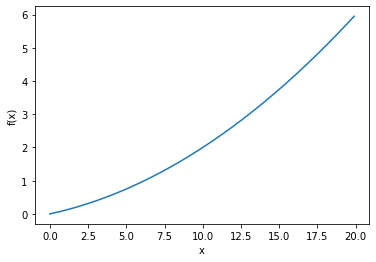

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np 
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) 
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()


In [17]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


In [20]:
def function_2(x):
    return np.sum(x**2)

In [21]:
def numerical_gradient(f,x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x 와 동일한 형상의 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val+h
        fxh1 = f(x)

        x[idx] = tmp_val-h
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val

    return grad

In [22]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [25]:
def gradient_descent(f,init_x, lr=0.01, stap_num=100):
    x = init_x

    for i in range(stap_num):
        grad = numerical_gradient(f,x)
        x -=lr*grad
    return x

def function_2(x):
    return np.sum(x**2)

init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x,lr=0.1,stap_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [26]:
import sys, os
sys.path.append(os.pardir)
import numpy as np 
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z =self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)

        return loss

In [27]:
net = simpleNet()
print(net.W)

[[-1.94646003 -1.63008243  0.85545117]
 [ 0.41685187  0.7834528   0.06720431]]


In [28]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)
np.argmax(p)

[-0.79270934 -0.27294194  0.57375458]


2

In [29]:
t = np.array([0,0,1])

net.loss(x,t)

0.521074543690188

In [31]:
def f(W):
    return net.loss(x,t)

f = lambda w : net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.09086645  0.15280434 -0.24367079]
 [ 0.13629968  0.2292065  -0.36550618]]


In [34]:
import sys, os 
sys.path.append(os.pardir)
from common.functions import * 
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1 
        z1 = sigmoid(a1)
        a2 = np.dot(z1 , W2) + b2
        y  = softmax(a2)

        return y
    
    def loss(self,x,t):
        y = self.predict(x)

        return cross_entropy_error(y,t)

    def accuracy(self, x, y):
        y = self.predict(x)
        y= np.argmax(y,axis=1)
        t= np.argmax(t,axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_w = lambda W : self.loss(x,t)

        grads = {}
        grads['W1'] =numerical_gradient(loss_w, self.params['W1'])
        grads['b1'] =numerical_gradient(loss_w, self.params['b1'])
        grads['W2'] =numerical_gradient(loss_w, self.params['W2'])
        grads['b2'] =numerical_gradient(loss_w, self.params['b2'])

        return grads

In [46]:

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [42]:
import sys, os 
sys.path.append(os.pardir)
import numpy as np 
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]

batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch,t_batch)

    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    # if i%100 == 0:
    print('count  '+ i )


KeyboardInterrupt: 

In [47]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.10453333333333334, 0.1029
train acc, test acc | 0.7915166666666666, 0.7947
train acc, test acc | 0.8714833333333334, 0.8763
train acc, test acc | 0.8980166666666667, 0.9015
train acc, test acc | 0.90785, 0.9089
train acc, test acc | 0.9146, 0.9162
train acc, test acc | 0.9189833333333334, 0.9213
train acc, test acc | 0.9229333333333334, 0.9255
train acc, test acc | 0.9272, 0.9294
train acc, test acc | 0.9310666666666667, 0.9334
train acc, test acc | 0.9340666666666667, 0.9343
train acc, test acc | 0.9360833333333334, 0.9362
train acc, test acc | 0.9391166666666667, 0.9388
train acc, test acc | 0.9410333333333334, 0.9396
train acc, test acc | 0.94415, 0.9427
train acc, test acc | 0.9454833333333333, 0.9446
train acc, test acc | 0.94745, 0.946


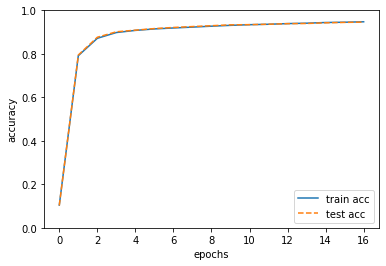

In [48]:

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()